# Linear regression

Linear regression is the simplest model of machine learning. 
The purpose of regression is to explain and predict a variable $y$ using a variable $x$ (or several variables $x_{(1)}$, ...,$x_{(n)}$ ).  

The variable $y$ is called the **target** (dependent variable) , and the variables $x$ are called  **feature(s)** (independent variables).

By convention, we call the number of rows $m$. The number of features is represented by $n$.

In this example, $m=7$ and $n=3$.

**Note**: In this notebook, every time we will talk about programming variables, we will format the names like `this`. For mathematical variables and functions, we'll be formatting them like $this$.
##线性回归

线性回归是最简单的机器学习模型。
回归的目的是使用一个变量 $x$（或多个变量 $x_{(1)}$、...、$x_{(n)}$）来解释和预测一个变量 $y$。 

变量 y$ 称为**目标**（因变量），变量 x$ 称为**特征**（自变量）。

按照惯例，我们称行数为 $m$。特征的数量用 $n$ 表示。

在本例中，$m=7$，$n=3$。

**注意**： 在本手册中，每次谈到程序变量时，我们都会将其名称格式化为 “this”。对于数学变量和函数，我们将使用 $this$ 的格式。

![image dataset](./assets/example_data.png)

## Modeling the problem
In this chapter, we will analyze simple linear regression on an example. This presentation will allow us to explain linear regression in a simple case in order to understand the stakes of this method, the problems posed and the answers brought.

Let's take this dataset which contains data on an employee's salary based on his years of experience.

In [78]:
import pandas as pd

df = pd.read_csv("./data/salary_data.csv")

In [79]:
df.head(10)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [80]:
list(df.columns)

['YearsExperience', 'Salary']

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


**Exercise:** Find the values of $m$ and $n$ of this dataset. 
m = number of samples 
n =  number of features 

In [82]:
df.shape

(30, 2)

In [83]:
m, n= df.shape

print("Number of samples (m):", m)
print("Number of features (n):", n)

Number of samples (m): 30
Number of features (n): 2


In [84]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


In [85]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [86]:
"""# 验证样本数（行数）
samples = df.loc[:, :].shape[0]
print("Verified number of samples using loc:", samples)

# 验证特征数（列数 - 1）
features = df.iloc[:, :-1].shape[1]
print("Verified number of features using iloc:", features)"""

'# 验证样本数（行数）\nsamples = df.loc[:, :].shape[0]\nprint("Verified number of samples using loc:", samples)\n\n# 验证特征数（列数 - 1）\nfeatures = df.iloc[:, :-1].shape[1]\nprint("Verified number of features using iloc:", features)'

In [87]:
# 使用 loc 获取行数和列数
m_loc = df.loc[:, :].shape[0]
n_loc = df.loc[:, :].shape[1] - 1  # 减去1，因为最后一列是目标列

# 使用 iloc 获取行数和列数
m_iloc = df.iloc[:, :].shape[0]
n_iloc = df.iloc[:, :].shape[1] - 1  # 减去1，因为最后一列是目标列

print("Number of samples (m) using loc:", m_loc)
print("Number of features (n) using loc:", n_loc)
print("Number of samples (m) using iloc:", m_iloc)
print("Number of features (n) using iloc:", n_iloc)


Number of samples (m) using loc: 30
Number of features (n) using loc: 1
Number of samples (m) using iloc: 30
Number of features (n) using iloc: 1


### 1. Goals
We want to know whether, in general, years of experience have an influence on the wage and in what form this influence can be expressed. The goal is to better explain how wages vary with years of experience and possibly to predict wages based on years of experience.
### 1. 目标
我们想知道，在一般情况下，工作年限是否对工资有影响，以及这种影响以何种形式表现出来。我们的目标是更好地解释工资如何随工作年限而变化，并在可能的情况下根据工作年限预测工资。

### 2. Variables studied
In this example, we are going to do a simple regression and we will therefore define two variables.
- The variable `y` is the variable that must be regressed. The target to be predicted.
- The variable `X` which will be the explanatory variable. The feature.
The unofficial convention is to have uppercase `X` because it will usually be a 2D array (multiple features). However it's not the case here. `y` is lower case because it's just a 1D vector.

### 2. 研究变量
在本例中，我们将进行简单的回归，因此将定义两个变量。
- 变量 `y` 是必须回归的变量。要预测的目标。
- 变量 `X` 是解释变量。特征。

非官方的惯例是将 `X` 大写，因为它通常是一个二维数组（多个特征）。但此处并非如此。y "小写，因为它只是一个一维向量。

**Exercise:**  Create the `X` and `y` variables and define which column will be the target and which column will be the feature.  
Variables `X` and `y` be must of type `numpy.ndarray`
**练习：** 创建 `X` 和 `y` 变量，并定义哪一列是目标列，哪一列是特征列。 
变量 `X` 和 `y` 必须是 `numpy.ndarray` 类型。

In [88]:
import numpy as np

X = df['YearsExperience'].values.reshape(-1, 1)
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [89]:
y = df['Salary'].values
y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872])

### 3. Relationship between variables
Now it is a question of finding the type of relationship between the two variables.

To do so, we will display in a scatter plot (randomly generated) variables that may or may not have any link between each other. Let's see what kind of relation we can obtain.


**No correlation**  

Very rounded scatter plot, there is no apparent relationship.

![](./assets/scatter_plot_0.png)

**Positive linear correlation**
  
Very stretched scatter plot. The cloud has a very marked linear shape. There is a tendency for the two variables to vary in the same direction. The observed correlation is positive.

![](./assets/scatter_plot_1.png)

**Negative linear correlation**
  
The scatterplot is moderately stretched (linear form but less marked), from top left to bottom right: one observes on the sample a tendency of the variables to vary in opposite directions, the observed correlation is negative.

![](./assets/scatter_plot_2.png)

**Perfect non-linear correlation**
  
The points are on a non-linear (parabolic) curve. The correlation observed is perfect, however it's non-linear. There is no monotonicity: the curve is first decreasing and then increasing.

![](./assets/scatter_plot_3.png)

Now let's visualize our dataset on a scatter plot:

**Exercise:** Create a scatter plot with matplotlib and the `X` and `y` data.  
Add the label salary for the y-axis and number of years of experience for the x-axis.

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))  

plt.scatter(X, y, color='blue', marker='o', label='Data points')  

plt.xlabel('Number of Years of Experience') 
plt.ylabel('Salary')  

plt.title('Relationship between Years of Experience and Salary')  # Plot title

plt.legend()  

plt.grid(True)  

plt.show()

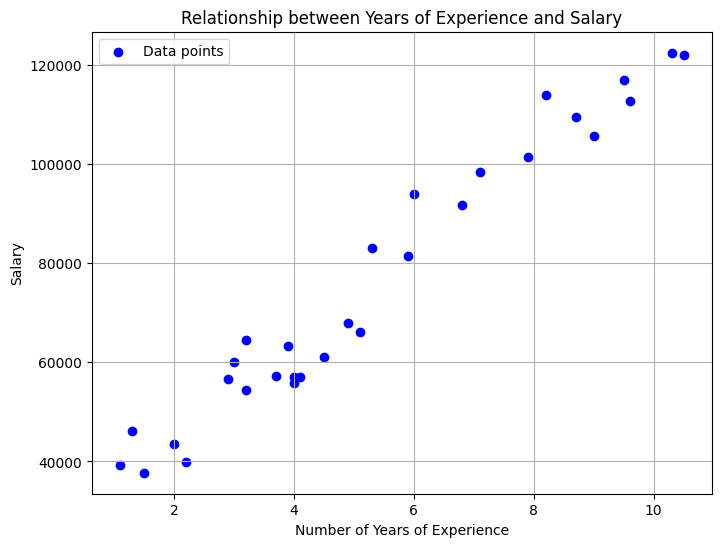

In [90]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(8, 6))  

plt.scatter(X, y, color='blue', marker='o', label='Data points')  

plt.xlabel('Number of Years of Experience')  
plt.ylabel('Salary')  

plt.title('Relationship between Years of Experience and Salary') 
plt.legend() 
 
plt.grid(True)  
plt.show()  


You should see the stretched and increasing shape of the scatter plot suggesting a linear-type positive correlation.
您应该看到散点图的拉伸和递增形状，这表明存在线性正相关

We can also check the correlation rate between the variables. 

**Exercise:** Display the correlation rate between the two variables. 

In [91]:
corr = df.corr().round(3)
corr

,YearsExperience,Salary
YearsExperience,1.000,0.978
Salary,0.978,1.000


### 4. Split the dataset

The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms for your predictive modeling problem.

Generally, the training dataset contains 80% of the whole dataset. The remaining 20% is for the test dataset.

**Exercise:** Import `train_test_split` from `sklearn` and split the dataset and create the variables `X_train`, `X_test`, `y_train`, `y_test`.
当机器学习算法用于对未用于训练模型的数据进行预测时，训练-测试分割程序可用于估算机器学习算法的性能。

这是一种快速、简便的程序，其结果可以让您比较机器学习算法在预测建模问题上的性能。

一般来说，训练数据集占整个数据集的 80%。剩下的 20% 用于测试数据集。

**练习：** 从 `sklearn` 中导入 `train_test_split` 并分割数据集，创建变量 `X_train`, `X_test`, `y_train`, `y_test`.

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [93]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (24, 1)
Shape of X_test:  (6, 1)
Shape of y_train:  (24,)
Shape of y_test:  (6,)


### 5. Load and fit the model

We could see that the Linear Model could help us make good generalizations about our dataset. However, our model has to train several times on our training set. It is therefore an iterative algorithm. And at each iteration, the algorithm will calculate the error rate of the mean of the trained data set. The algorithm will then try to regress this error rate until it is as small as possible. 

But we are lucky because the sklearn library already has a ready-made linear model that minimizes this error rate. 
### 5. 加载并拟合模型

我们可以看到，线性模型可以帮助我们对数据集进行很好的归纳。但是，我们的模型必须在训练集上进行多次训练。因此，这是一种迭代算法。每次迭代时，算法都会计算训练数据集平均值的误差率。然后，算法会尝试回归误差率，直到误差率尽可能小为止。

不过我们很幸运，因为 sklearn 库中已经有一个现成的线性模型，可以将误差率降到最低。

**Exercise:** 
1. Import `LinearRegression` from sklearn.
2. Create a `regressor` variable and instantiate your `LinearRegression` class.
2. Train your model with `X_train` and `y_train`.

In [94]:

# Step 1: Import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Step 2: Create a regressor variable and instantiate LinearRegression
regressor = LinearRegression()

# Step 3: Train the model with X_train and y_train
regressor.fit(X_train, y_train)


LinearRegression()

In [95]:
c = regressor.intercept_
c

np.float64(27755.813972221964)

In [96]:
m = regressor.coef_
m

array([9274.02015633])

In [97]:
Y_pred_train = m*X_train + c
Y_pred_train

array([[ 46303.85428488],
       [ 54650.47242558],
       [116786.40747298],
       [ 69488.9046757 ],
       [101020.57320722],
       [125133.02561367],
       [103802.77925412],
       [ 57432.67847247],
       [ 76908.12080076],
       [108439.78933228],
       [123278.22158241],
       [ 37957.23614418],
       [ 55577.87444121],
       [ 82472.53289456],
       [ 73198.51273823],
       [ 93601.35708216],
       [ 83399.9349102 ],
       [ 64851.89459754],
       [ 57432.67847247],
       [ 39812.04017545],
       [ 75053.3167695 ],
       [ 65779.29661317],
       [115859.00545735],
       [ 63924.4925819 ]])

In [103]:
y_pred_tain = regressor.predict(X_train)
y_pred_tain.flatten()

array([ 40101.0103979 ,  48823.84223023, 113760.47920419,  64331.09882103,
        97284.01907647, 122483.31103652, 100191.62968724,  51731.452841  ,
        72084.72711642, 105037.64737187, 120544.90396267,  31378.17856558,
        49793.04576715,  77899.94833797,  68207.91296872,  89530.39078107,
        78869.1518749 ,  59485.0811364 ,  51731.452841  ,  33316.58563943,
        70146.32004257,  60454.28467333, 112791.27566727,  58515.87759948])

OK, your model is trained.   
But let's check if our model is efficient. To do this we can display the score of our model. That is to say the number of correct predictions that our model was able to make.

**Exercise:** Display the score of your model with `X_train` and `y_train`.

In [98]:
train_score = regressor.score(X_train, y_train)
print(train_score)

0.955467281143287


Do you have a score above 90%? That's not bad! But let's now check if our model can make generalizations about data it has never seen before. 

### 6. Test your model
The `X_test` and `y_test` sets were previously created. Now it is time to use them. 

**Exercise:** Use the `predict` method of your model on your test dataset (`X_test`).

In [105]:
y_pred = regressor.predict(X_test)

**Exercise:** Display the score of your model with `X_test` and `y_test`.

In [106]:
regressor.fit(X_test,y_test)

LinearRegression()

What's your score? Is it higher than 90%? Awesome!

To make it more meaningful, let's visualize the training and testing of your model.  

**Exercise:** 
1. Plot `regressor.predict(X_train)`
2. Plot the training set on top of it
3. Add the title "Salary VS Experience (Training set)"
4. Add the label "Years of Experience" on the x-axis and "Salary" on the y-axis

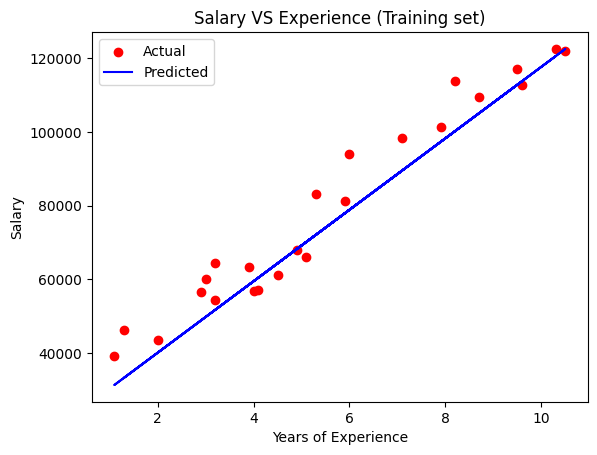

In [107]:
import matplotlib.pyplot as plt

# Assuming your model is named 'regressor'
# and you have your training data in X_train and y_train

# Plotting the predicted values for the training set
plt.scatter(X_train, y_train, color='red', label='Actual')
plt.plot(X_train, regressor.predict(X_train), color='blue', label='Predicted')

# Adding title and labels
plt.title('Salary VS Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()

# Display the plot
plt.show()


The expected result should look like this:

![train_plot](./assets/trainplot.png)

**Exercise:** Do the same with `X_test`!  
1. Plot `regressor.predict(X_test)`
2. Plot the testing set on top of it.
3. Add the title "Salary VS Experience (Test set)"
4. Add the label "Years of Experience" on the x-axis and "Salary" on the y-axis

The expected result should look like this:

![testplot.png](./assets/testplot.png)

**Exercise:** Have fun testing your model by entering new data. To give you an example, according to my model, when I have 210 years of experience, I will earn a salary of 1,982,420 / year. I am looking forward to reaching that many years of experience... 😎

Congratulations to you! You have just created your first machine learning model. 

![bravo](./assets/bravo.gif)